In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
 
from sklearn.svm import SVR
from sklearn.preprocessing import MinMaxScaler

Duplicate key in file PosixPath('/home/lxh/miniconda3/envs/rul_prediction/lib/python3.8/site-packages/matplotlib/mpl-data/matplotlibrc'), line 268 ('font.family         : sans-serif        ')
Duplicate key in file PosixPath('/home/lxh/miniconda3/envs/rul_prediction/lib/python3.8/site-packages/matplotlib/mpl-data/matplotlibrc'), line 272 ('font.sans-serif: DejaVu Sans, Bitstream Vera Sans, Computer Modern Sans Serif, Lucida Grande, Verdana, Geneva, Lucid, Arial, Helvetica, Avant Garde, sans-serif')


<class 'dict'> 4
dict_keys(['CS2_35', 'CS2_36', 'CS2_37', 'CS2_38'])


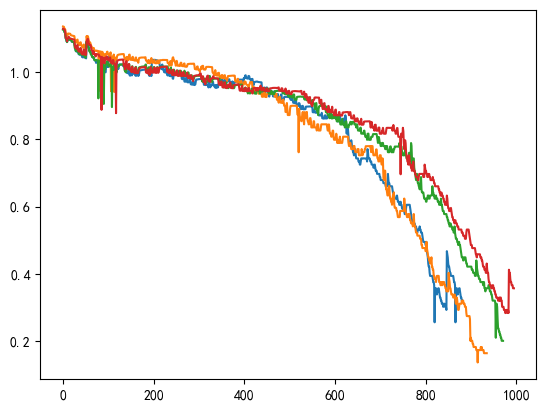

In [2]:
# 数据导入
dataset_path = "./data/calce/CALCE.npy"
Battery_list = ['CS2_35', 'CS2_36', 'CS2_37', 'CS2_38']
Battery = np.load(dataset_path, allow_pickle=True)
Battery = Battery.item()

calce_dataset = {}

print(type(Battery), len(Battery)) # dict, 4（四块电芯）
print(Battery.keys()) # dict_keys(['CS2_35', 'CS2_36', 'CS2_37', 'CS2_38'])
for cell in Battery.keys():
    # print(type(Battery[cell]), len(Battery[cell])) # Battery[cell]是一张dataframe
    calce_dataset[cell] = list(Battery[cell]["capacity"])
    # print(len(calce_dataset[cell])) # 882, 936, 972, 996
    plt.plot(calce_dataset[cell])

In [3]:
def build_sequences(data, time_steps):
    if type(data) != np.ndarray:
        data = np.array(data).reshape(-1, 1)
    return np.array([[j for j in data[i:i + time_steps]] for i in range(0, len(data) - time_steps + 1)])[:,:,0]    

# 构造训练和测试数据

b35 = np.array(calce_dataset[Battery_list[0]]).reshape(-1, 1)
b36 = np.array(calce_dataset[Battery_list[1]]).reshape(-1, 1)
b37 = np.array(calce_dataset[Battery_list[2]]).reshape(-1, 1)
b38 = np.array(calce_dataset[Battery_list[3]]).reshape(-1, 1)

time_steps = 16 # 15个时间步输入，1个时间步输出
b35 = build_sequences(b35, time_steps)
b36 = build_sequences(b36, time_steps)
b37 = build_sequences(b37, time_steps)
b38 = build_sequences(b38, time_steps)

print("测试样本生成函数")
test = np.array(range(10)).reshape(-1, 1)
test = build_sequences(test, 4)
print(test)

测试样本生成函数
[[0 1 2 3]
 [1 2 3 4]
 [2 3 4 5]
 [3 4 5 6]
 [4 5 6 7]
 [5 6 7 8]
 [6 7 8 9]]


训练集形状： (2859, 16)， 测试集形状： (867, 16)
(2859, 15) (2859, 1)
(867, 15) (867, 1)
(2859, 1) (867, 1)


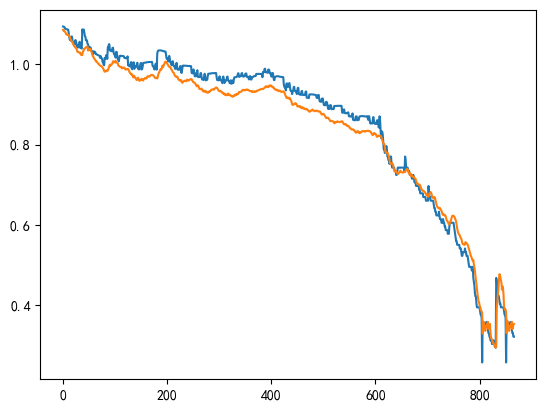

In [4]:
# b35作为测试集合
train_dataset = np.vstack((b38, b36, b37))
test_dataset = b35
print(f"训练集形状： {train_dataset.shape}， 测试集形状： {test_dataset.shape}")

x_train, y_train = train_dataset[:,:time_steps - 1], train_dataset[:, [time_steps - 1]]
x_test, y_test = test_dataset[:,:time_steps - 1], test_dataset[:, [time_steps - 1]]

print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

# SVR实现
model = SVR(kernel="rbf", gamma=0.5, C=10, epsilon=0.05)
model.fit(x_train, y_train[:,0])
y_train_pred = model.predict(x_train).reshape(-1,1)
y_test_pred = model.predict(x_test).reshape(-1,1)
print(y_train_pred.shape, y_test_pred.shape)

# 评估模型
# plt.figure(figsize=(10,3))
# plt.plot(y_test, color = 'red', linewidth=2.0, alpha = 0.6)
# plt.plot(y_test_pred, color = 'blue', linewidth=0.8)
# plt.legend(['Actual','Predicted'])
# plt.xlabel('循环圈数')
# plt.show()
plt.plot(y_test)
plt.plot(y_test_pred)

训练集形状： (2805, 16)， 测试集形状： (921, 16)
(2805, 15) (2805, 1)
(921, 15) (921, 1)
(2805, 1) (921, 1)


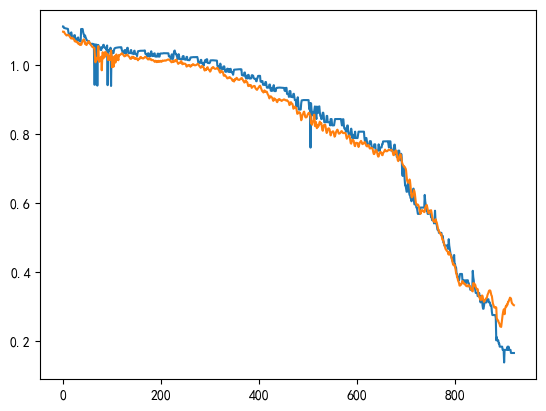

In [5]:
# b36作为测试集合
train_dataset = np.vstack((b35, b38, b37))
test_dataset = b36
print(f"训练集形状： {train_dataset.shape}， 测试集形状： {test_dataset.shape}")

x_train, y_train = train_dataset[:,:time_steps - 1], train_dataset[:, [time_steps - 1]]
x_test, y_test = test_dataset[:,:time_steps - 1], test_dataset[:, [time_steps - 1]]

print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

# SVR实现
model = SVR(kernel="rbf", gamma=0.5, C=10, epsilon=0.05)
model.fit(x_train, y_train[:,0])
y_train_pred = model.predict(x_train).reshape(-1,1)
y_test_pred = model.predict(x_test).reshape(-1,1)
print(y_train_pred.shape, y_test_pred.shape)

# 评估模型
plt.plot(y_test)
plt.plot(y_test_pred)

训练集形状： (2769, 16)， 测试集形状： (957, 16)
(2769, 15) (2769, 1)
(957, 15) (957, 1)
(2769, 1) (957, 1)


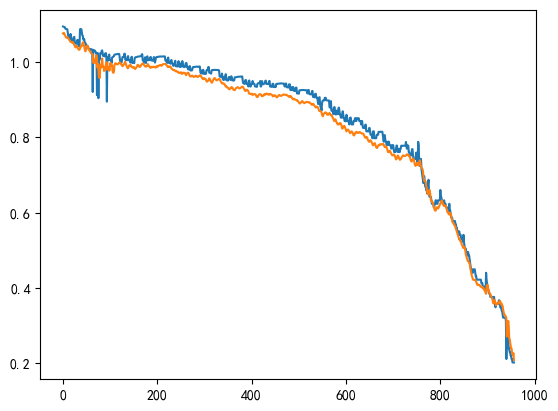

In [6]:
# b37作为测试集合
train_dataset = np.vstack((b35, b36, b38))
test_dataset = b37
print(f"训练集形状： {train_dataset.shape}， 测试集形状： {test_dataset.shape}")

x_train, y_train = train_dataset[:,:time_steps - 1], train_dataset[:, [time_steps - 1]]
x_test, y_test = test_dataset[:,:time_steps - 1], test_dataset[:, [time_steps - 1]]

print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

# SVR实现
model = SVR(kernel="rbf", gamma=0.5, C=10, epsilon=0.05)
model.fit(x_train, y_train[:,0])
y_train_pred = model.predict(x_train).reshape(-1,1)
y_test_pred = model.predict(x_test).reshape(-1,1)
print(y_train_pred.shape, y_test_pred.shape)

# 评估模型
plt.plot(y_test)
plt.plot(y_test_pred)

训练集形状： (2745, 16)， 测试集形状： (981, 16)
(2745, 15) (2745, 1)
(981, 15) (981, 1)
(2745, 1) (981, 1)


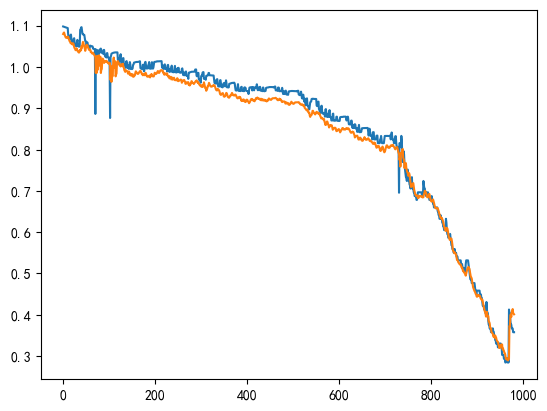

In [7]:
# b38作为测试集合
train_dataset = np.vstack((b35, b36, b37))
test_dataset = b38
print(f"训练集形状： {train_dataset.shape}， 测试集形状： {test_dataset.shape}")

x_train, y_train = train_dataset[:,:time_steps - 1], train_dataset[:, [time_steps - 1]]
x_test, y_test = test_dataset[:,:time_steps - 1], test_dataset[:, [time_steps - 1]]

print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

# SVR实现
model = SVR(kernel="rbf", gamma=0.5, C=10, epsilon=0.05)
model.fit(x_train, y_train[:,0])
y_train_pred = model.predict(x_train).reshape(-1,1)
y_test_pred = model.predict(x_test).reshape(-1,1)
print(y_train_pred.shape, y_test_pred.shape)

# 评估模型
plt.plot(y_test)
plt.plot(y_test_pred)